# CHAPTER 01 - Introduction to Time Series
---

## 0.0. Imports

In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib           import pyplot as plt
from IPython.core.display import HTML
from IPython.display      import Image

%matplotlib inline

## 0.1. Helper Functions

In [11]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [12]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 1.0. Monthly C02 Concentrations

In [10]:
data = pd.read_csv( '../../data/Monthly_CO2_Concentrations.csv', converters = {'Year': np.int32, 'Month': np.int32} )
data = data[['CO2', 'Year', 'Month']]
data['Date'] = data['Year'].astype( str ) + '-' + data['Month'].astype( str )

FileNotFoundError: [Errno 2] File b'../../data/Monthly_CO2_Concentrations.csv' does not exist: b'../../data/Monthly_CO2_Concentrations.csv'

In [11]:
data.head()

NameError: name 'data' is not defined

In [12]:
# remove all columns having missing values
data = data.loc[ (~pd.isnull( data['CO2'] ) ) & (~pd.isnull( data['Year'] ) ) & (~pd.isnull( data['Month'] ) ) ]
data = data.sort_values( ['Year', 'Month'] )

NameError: name 'data' is not defined

In [13]:
data.head()

NameError: name 'data' is not defined

In [14]:
plt.figure( figsize=(5.5, 5.5) )
data['CO2'].plot( color='b' )
plt.title( 'Monthly CO2 concentrations' )
plt.xlabel( 'Time' )
plt.ylabel( 'CO2 concentration' )
plt.xticks( rotation=30 );

NameError: name 'data' is not defined

<Figure size 396x396 with 0 Axes>

## 2.0. DJIA  

In [15]:
djia_df = pd.read_excel( '../../data/DJIA_Jan2016_Dec2016.xlsx' )
djia_df.head() 

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [16]:
g = sns.tsplot( djia_df['Close'] )
g.set_title( 'Dow Jones Industrial Average between Jan 2016 - Dec 2016' )
g.set_xlabel( 'Time' )
g.set_ylabel( 'Closing Value' )

NameError: name 'djia_df' is not defined

In [17]:
lag = np.arange( 0, 31 )
djia_acf = []
for l in lag:
    djia_acf.append( djia_df['Close'].autocorr(l) )

NameError: name 'djia_df' is not defined

In [18]:
g = sns.pointplot( x=lag, y=djia_acf, markers='.' )
g.set_title( 'Autocorrelation function of DJIA' );
g.set_xlabel( 'Lag in terms of number of trading days' );
g.set_ylabel( 'Autocorrelation function' );
g.set_xticklabels( lag, rotation=90 );

ValueError: Grouper and axis must be same length

# CHAPTER 02 - Understanding Time Series Data
---

In [19]:
import os
import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv( '../data/chemical-concentration-readings.csv' ) 

FileNotFoundError: [Errno 2] File b'../data/chemical-concentration-readings.csv' does not exist: b'../data/chemical-concentration-readings.csv'

In [21]:
print( 'Shape of the dataset:', df.shape )
df.head( 10 )

NameError: name 'df' is not defined

In [22]:
datetime_rowid = df['Timestamp'].map( lambda t: pd.to_datetime( t, format='%Y-%m-%d %H:%M:%S' ) )
df.index = datetime_rowid
df.head( 10 )

NameError: name 'df' is not defined

In [23]:
daily = df['Chemical conc.'].resample( 'D' )
daily_mean = daily.mean()

NameError: name 'df' is not defined

NameError: name 'df' is not defined

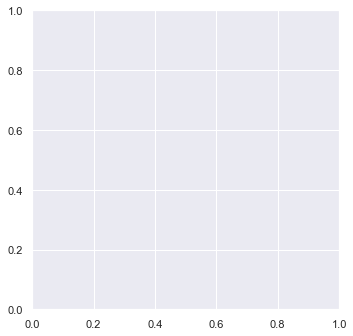

In [24]:
fig = plt.figure( figsize=(5.5, 5.5) )
ax = fig.add_subplot( 1, 1, 1 )
df['Chemical conc.'].plot( ax=ax, color='b' )
daily_mean.plot( ax=ax, color='r' )

# CHAPTER 04 - Auto-Regressive Models
---

In [31]:
import numpy               as np
import pandas              as pd
import statsmodels.tsa.api as smtsa

from matplotlib                    import pyplot as plt
from statsmodels.tsa.stattools     import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
def plotds( xt, nlag=30, fig_size=(12, 10) ):
    if not isinstance( xt, pd.Series ):
        xt = pd.Series( xt )
        
    fig_plt = plt.figure( figsize=fig_size )
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid( layout, (0, 0), colspan=2 )
    ax_acf = plt.subplot2grid( layout, (1, 0) )
    ax_pacf = plt.subplot2grid( layout, (1, 1) )
    
    # Plot graphs
    xt.plot( ax=ax_xt )
    ax_xt.set_title( 'Time Series' )
    plot_acf( xt, lags=50, ax=ax_acf )
    plot_pacf( xt, lags=50, ax=ax_pacf )
    plt.tight_layout()
    
    return None

## 4.1. Auto-regressive models

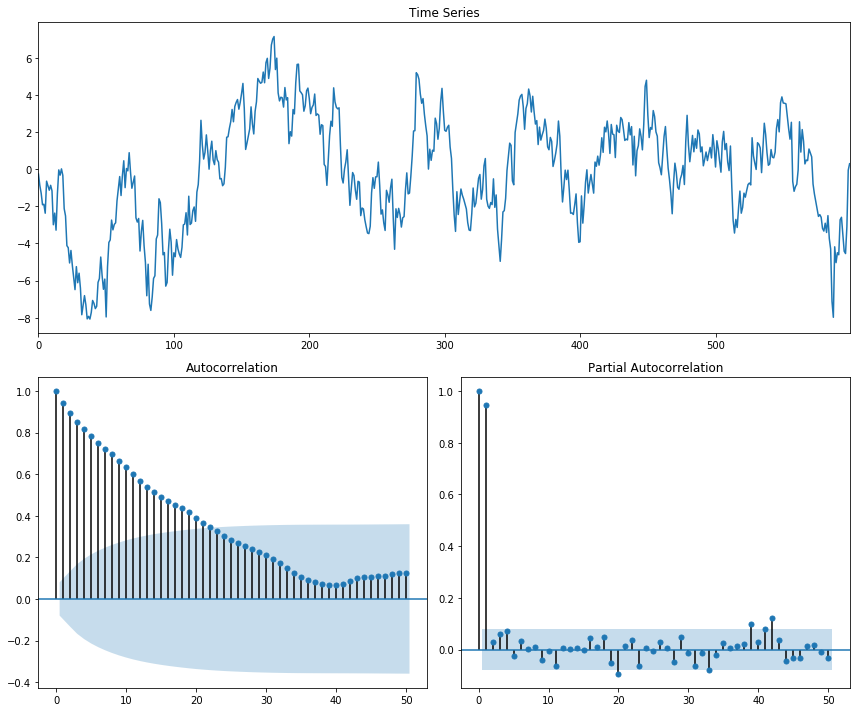

In [3]:
# Number o samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, -0.95]
ma = np.r_[1, 0]

ar1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar1_data )

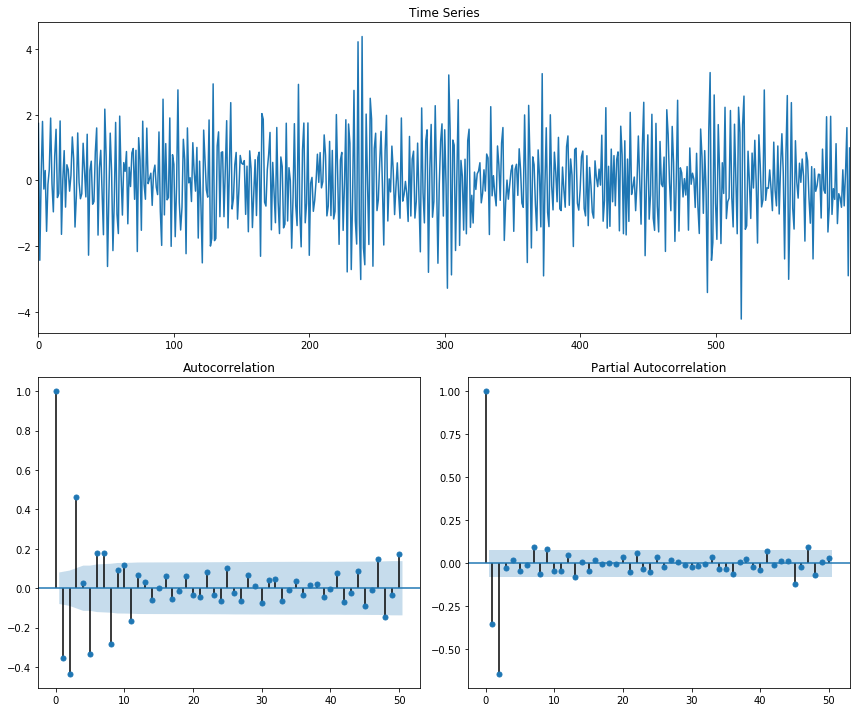

In [4]:
# Generate AR(2) dataset
n = 600
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]

ar2_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar2_data )

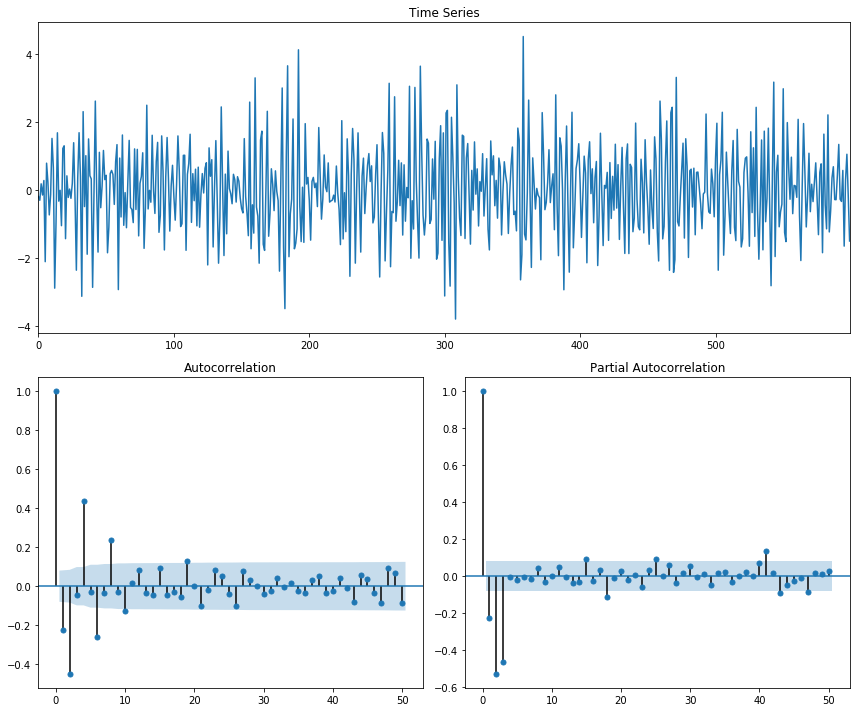

In [5]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]

ar3_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar3_data )

In [6]:
# Build AR(1) model
ar1model = smtsa.ARMA( ar1_data.tolist(), order=(1, 0) )
ar1 = ar1model.fit( maxlag=30, method='mle', trend='nc' )
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -844.421
Method:                           mle   S.D. of innovations              0.987
Date:                Thu, 28 Nov 2019   AIC                           1692.841
Time:                        05:09:47   BIC                           1701.635
Sample:                             0   HQIC                          1696.265
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9420      0.013     70.545      0.000       0.916       0.968
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0616           +0.0000j            1.0616            0.0000
-----------------------------------------------------------------------------
"""

In [7]:
# Build AR(3) model
ar3model = smtsa.ARMA( ar3_data.tolist(), order=(3, 0) )
ar3 = ar3model.fit( maxlag=30, method='mle', trend='nc' )
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -826.989
Method:                           mle   S.D. of innovations              0.959
Date:                Thu, 28 Nov 2019   AIC                           1661.978
Time:                        05:09:47   BIC                           1679.566
Sample:                             0   HQIC                          1668.825
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5918      0.036    -16.375      0.000      -0.663      -0.521
ar.L2.y       -0.6878      0.033    -20.795      0.000      -0.753      -0.623
ar.L3.y       -0.4639      0.036    -12.872      0.000      -0.535      -0.393
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0358           -1.1772j            1.1777           -0.2452
AR.2            0.0358           +1.1772j            1.1777            0.2452
AR.3           -1.5542           -0.0000j            1.5542           -0.5000
-----------------------------------------------------------------------------
"""

## 4.2. Moving Average Models

In [8]:
# MA models use dependency between residual errors to forecast values in the next time period.
# The model helps you adjust for any unpredictable events sucha as catastrophic events leading to a share market crash leasding to share price falling,
#     which will happen over time and is captured as moving average process.

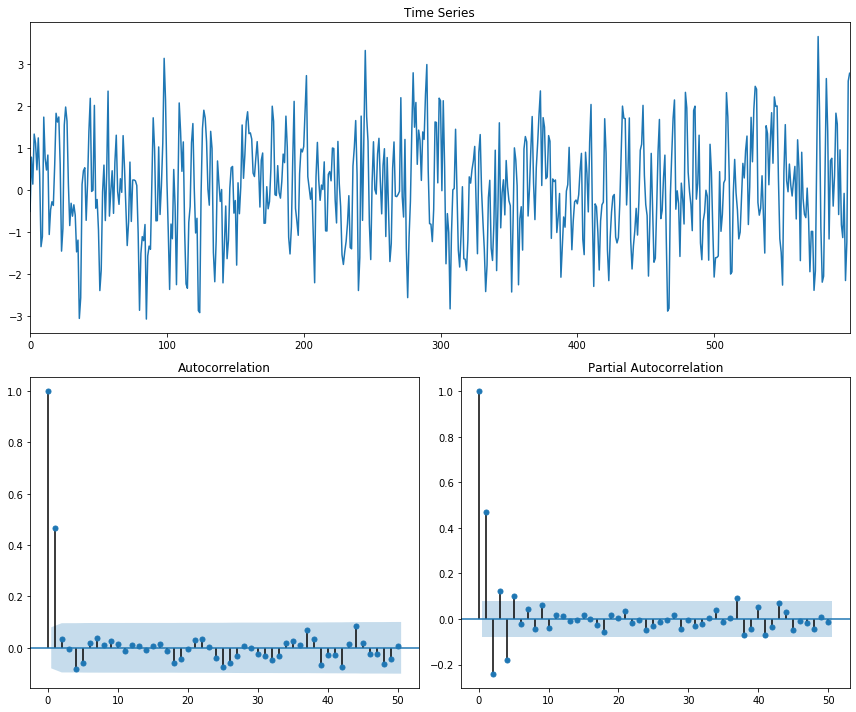

In [9]:
# Number of samples
n = 600

# Generate MA(1)
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma1_data )

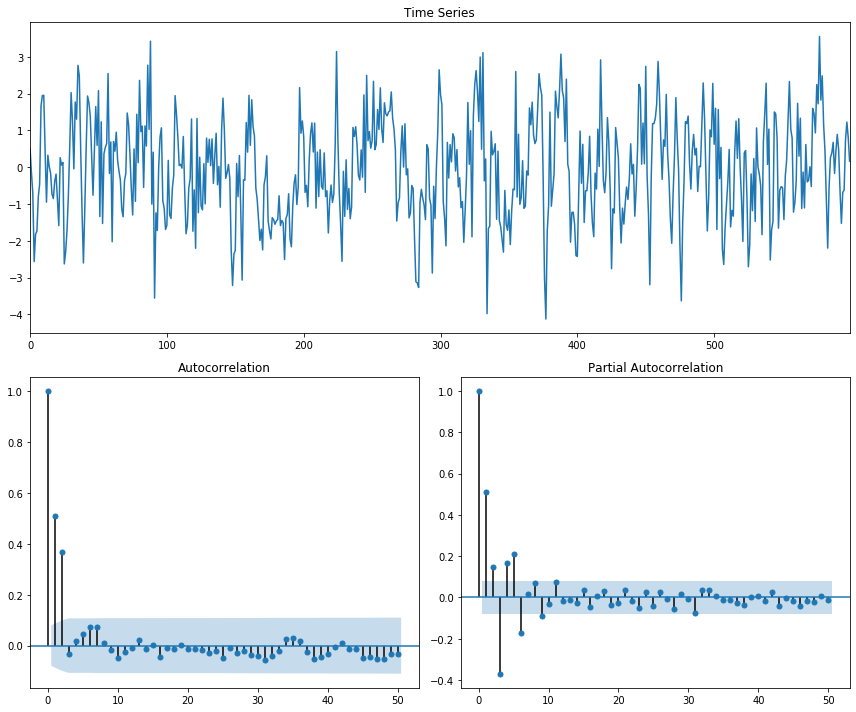

In [10]:
# Generate MA(2)
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma2_data )

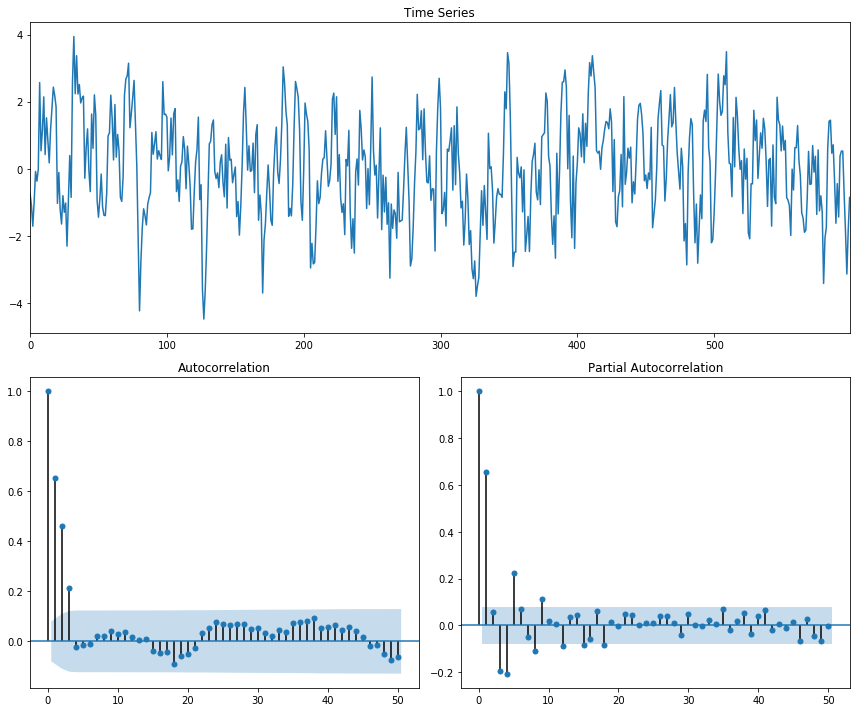

In [11]:
# Generate MA(3)
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma3_data )

In [12]:
# Build MA(1) model
ma1 = smtsa.ARMA( ma1_data.tolist(), order=(0, 1) ).fit( maxlag=30, method='mle', trend='nc' )
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -867.624
Method:                           mle   S.D. of innovations              1.027
Date:                Thu, 28 Nov 2019   AIC                           1739.248
Time:                        05:09:51   BIC                           1748.042
Sample:                             0   HQIC                          1742.671
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6743      0.032     20.747      0.000       0.611       0.738
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4831           +0.0000j            1.4831            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
# Build MA(3) model
ma3 = smtsa.ARMA( ma3_data.tolist(), order=(0, 3) ).fit( maxlag=30, method='mle', trend='nc' )
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -868.482
Method:                           mle   S.D. of innovations              1.028
Date:                Thu, 28 Nov 2019   AIC                           1744.964
Time:                        05:09:51   BIC                           1762.551
Sample:                             0   HQIC                          1751.810
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6362      0.037     17.120      0.000       0.563       0.709
ma.L2.y        0.6835      0.035     19.557      0.000       0.615       0.752
ma.L3.y        0.5015      0.038     13.185      0.000       0.427       0.576
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0396           -1.1752j            1.1759           -0.2446
MA.2            0.0396           +1.1752j            1.1759            0.2446
MA.3           -1.4421           -0.0000j            1.4421           -0.5000
-----------------------------------------------------------------------------
"""

## 4.3. Building datasets with ARMA

In [14]:
# AR(q) regresses on its own lagged terms.
# - It tends to capture the mean reversion effect 
# MA(q) builds a function of error terms of the past.
# - It tends to capture the shock effect in error, which are normal or unpredictoed

# ARMA(p,q) = AR(q) + MA(q)

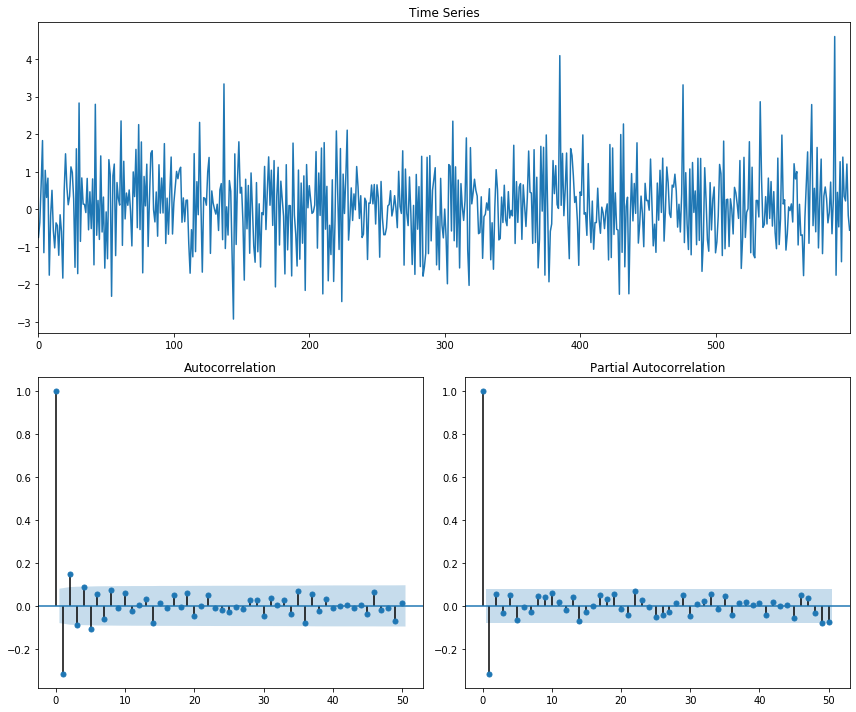

In [15]:
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]

ar1ma1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar1ma1_data )

In [16]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA( ar1ma1_data.tolist(), order=(1, 1) ).fit( maxlag=30, method='mle', trend='nc' )
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -842.851
Method:                           mle   S.D. of innovations              0.986
Date:                Thu, 28 Nov 2019   AIC                           1691.701
Time:                        05:09:52   BIC                           1704.892
Sample:                             0   HQIC                          1696.836
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5506      0.129     -4.275      0.000      -0.803      -0.298
ma.L1.y        0.2729      0.152      1.800      0.072      -0.024       0.570
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8161           +0.0000j            1.8161            0.5000
MA.1           -3.6639           +0.0000j            3.6639            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
# Optimize ARMA parameters
aicVal = []
for ari in range( 1, 3 ):
    for maj in range( 1, 3 ):
        arma_obj = smtsa.ARMA( ar1ma1_data.tolist(), order=(ari, maj) ).fit( maxlag=30, method='mle', trend='nc' )
        aicVal.append( [ari, maj, arma_obj.aic] )

In [18]:
pd.DataFrame( aicVal, columns=['AR', 'MA', 'AIC'] )

,AR,MA,AIC
0,1,1,1691.701419
1,1,2,1691.568896
2,2,1,1691.153988
3,2,2,1693.153941


### 4.3.1. IBM Stock Prices

In [19]:
# Load modules
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load Dataset
ibm_df = pd.read_csv( '../data/ibm_common_stock_closing_prices.csv' )

# Rename the second column
ibm_df.rename( columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True )

In [20]:
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


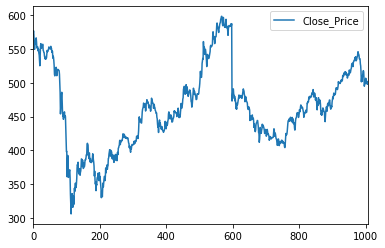

In [21]:
ibm_df.plot()

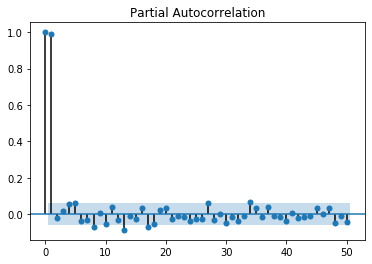

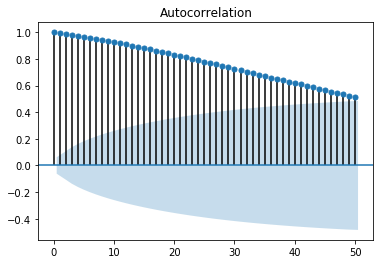

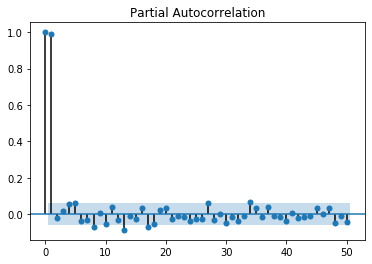

In [22]:
# Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ibm_df['residual'] = ibm_df['Close_Price'] - ibm_df['Close_Price'].mean()
ibm_df = ibm_df.dropna()

plot_acf( ibm_df.residual, lags=50 )
plot_pacf( ibm_df.residual, lags=50 )

In [23]:
156+135

291

In [24]:
sns.distplot( ibm_df['residual'], kde=False, bins=29 );

NameError: name 'sns' is not defined

In [ ]:
# Optimize ARMA parameters
aicVal = []
for ari in range( 1, 3 ):
    for maj in range( 0, 3 ):
        arma_obj = smtsa.ARMA( ibm_df.Close_Price.tolist(), order=(ari, maj) ).fit( maxlag=30, method='mle', trend='nc' )
        aicVal.append( [ari, maj, arma_obj.aic] )

In [ ]:
pd.DataFrame( aicVal, columns=['AR', 'MA', 'AIC'] )

In [ ]:
# Building optimized model using minimum AIC
arma_obj_fin = smtsa.ARMA( ibm_df.Close_Price.tolist(), order=(1, 1) ).fit( maxlag=30, method='mle', trend='nc' )
ibm_df['ARMA'] = arma_obj_fin.predict()

In [ ]:
# Plot the curves
f, axarr = plt.subplots( 1, sharex=True )
#f.set_size_inches( 5.5, 5.5 )
ibm_df['Close_Price'].iloc[1:].plot( color='b', linestyle='-', ax=axarr )
ibm_df['ARMA'].iloc[1:].plot( color='r', linestyle='--', ax=axarr )
axarr.set_title( 'ARMA(1, 0)' )
plt.xlabel( 'Index' )
plt.ylabel( 'Closing price' )

## 4.4. ARIMA

In [29]:
djia_df = pd.read_excel( '../data/DJIA_Jan2016_Dec2016.xlsx' )
djia_df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


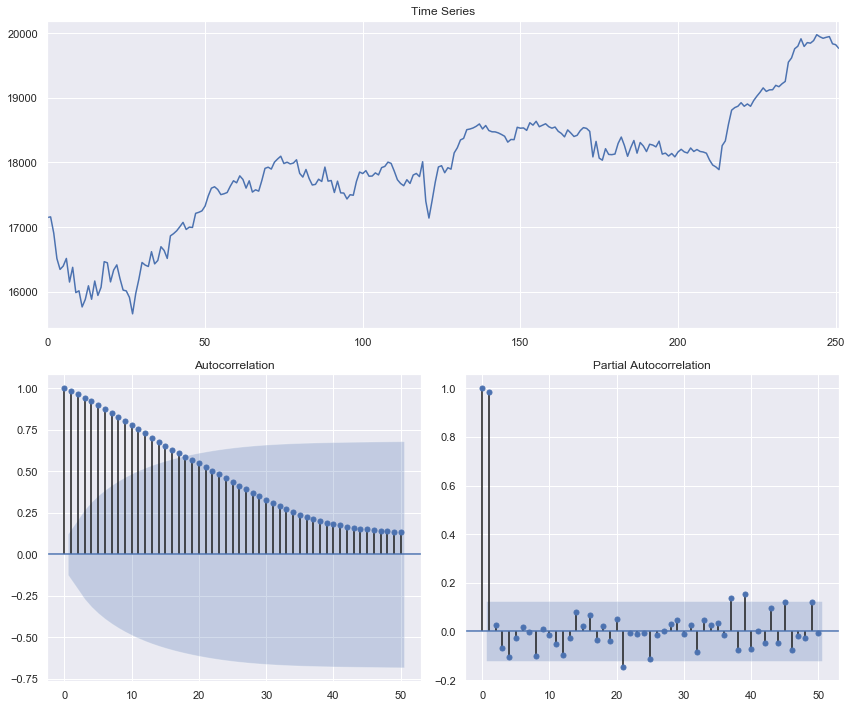

In [41]:
plotds( djia_df['Close'] )

In [34]:
# ADF Test
adf_result = adfuller( djia_df.Close.tolist() )
print( 'ADF Statistic: %f' % adf_result[0] )
print( 'p-value: %f' % adf_result[1] )

ADF Statistic: -0.462320
p-value: 0.899162


In [35]:
# Force fit ARMA( 1, 1 ) model on non-stationary signal
arma_obj = smtsa.ARMA( djia_df['Close'].tolist(), order=(1, 1) ).fit( maxlag=30, method='mle', trend='nc' )

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

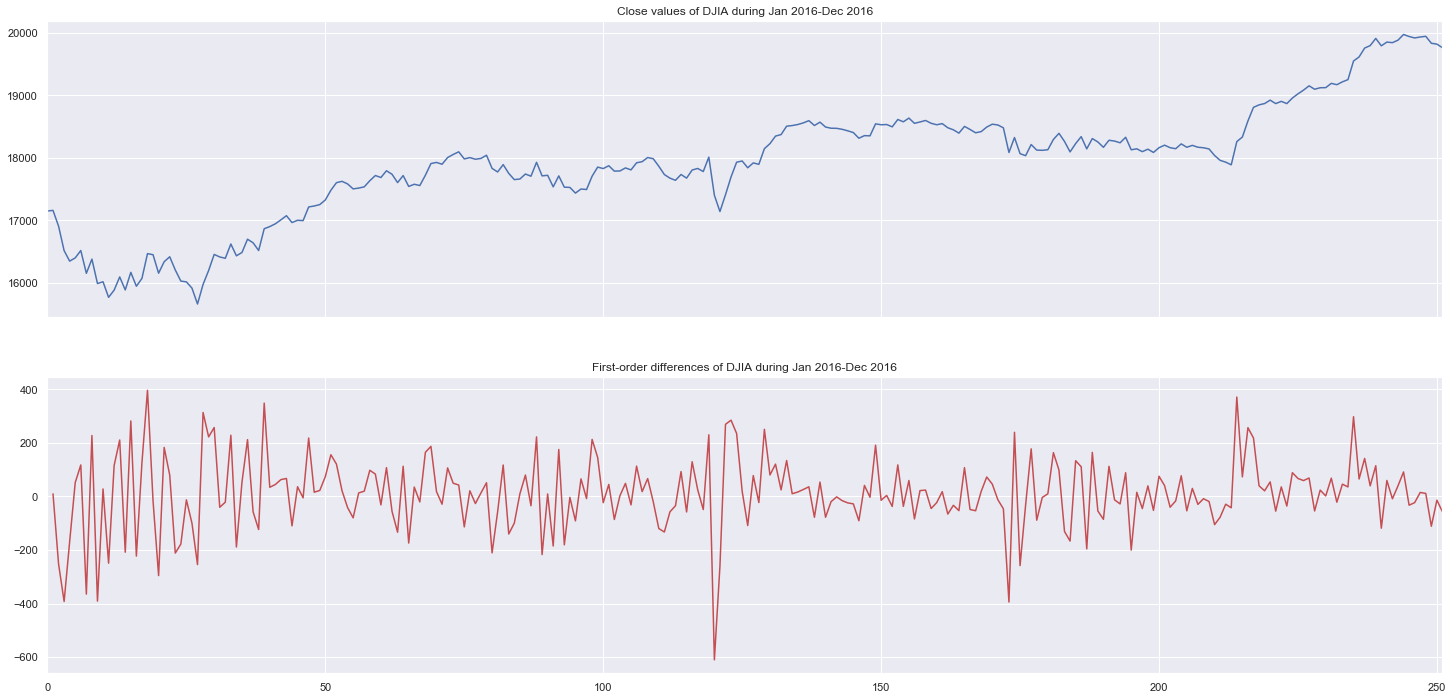

In [40]:
# Let us plot the original time series and first-differences
first_order_diff = djia_df['Close'].diff(1)
fig, ax = plt.subplots( 2, sharex=True )

djia_df['Close'].plot( ax=ax[0], color='b' )
ax[0].set_title( 'Close values of DJIA during Jan 2016-Dec 2016' )
first_order_diff.plot( ax=ax[1], color='r' )
ax[1].set_title( 'First-order differences of DJIA during Jan 2016-Dec 2016' )

In [46]:
# Optimize ARMA parameters
aicVal = []
for d in range( 1, 3 ):
    for ari in range( 0, 3 ):
        for maj in range( 0, 3 ):
            try:
                arima_obj = smtsa.ARIMA( djia_df['Close'].tolist(), order=(ari, d, maj) )
                arima_obj_fit = arima_obj.fit()
                aicVal.append( [ari, d, maj, arima_obj_fit.aic] )
            except ValueError:
                pass
pd.DataFrame( aicVal, columns=['AR', 'd', 'MA', 'AIC'] )

,AR,d,MA,AIC
0,0,1,0,3182.635727
1,0,1,1,3182.931550
2,0,1,2,3184.662279
3,1,1,0,3182.837153
4,1,1,1,3184.736151
5,2,1,0,3184.695359
6,2,1,1,3186.768527
7,2,1,2,3188.712545
8,0,2,0,3364.451295
9,0,2,1,3177.769461


In [47]:
# Evaluating fit using optimal parameter
arima_obj = smtsa.ARIMA( djia_df['Close'].tolist(), order=( 0, 2, 1 ) )
arima_obj_fit = arima_obj.fit( disp=0 )
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  250
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1585.885
Method:                       css-mle   S.D. of innovations            136.122
Date:                Thu, 28 Nov 2019   AIC                           3177.769
Time:                        05:44:30   BIC                           3188.334
Sample:                             2   HQIC                          3182.021
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.119      0.853      0.395      -0.131       0.334
ma.L1.D2.y    -1.0000      0.012    -81.004      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
# Evaluate prediction
pred = np.append( [0, 0], arima_obj_fit.fittedvalues.tolist() )
djia_df['ARIMA'] = pred
diffval = np.append( [0, 0], arima_obj_fit.resid+arima_obj_fit.fittedvalues )
djia_df['diffval'] = diffval

Text(0, 0.5, 'Closing price')

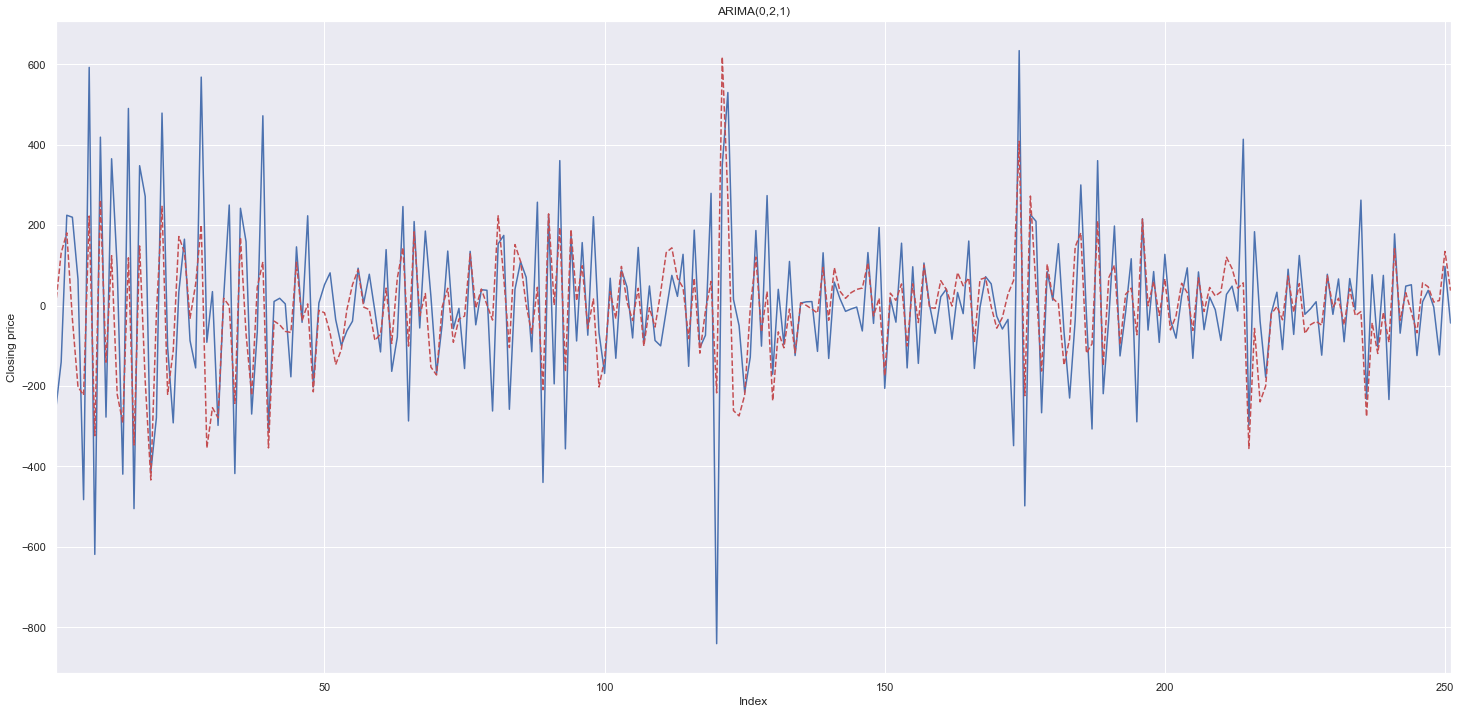

In [49]:
# Plot the curves
f, axarr = plt.subplots( 1, sharex=True )
djia_df['diffval'].iloc[2:].plot( color='b', linestyle='-', ax=axarr )
djia_df['ARIMA'].iloc[2:].plot( color='r', linestyle='--', ax=axarr )
axarr.set_title( 'ARIMA(0,2,1)' )
plt.xlabel( 'Index' )
plt.ylabel( 'Closing price' )

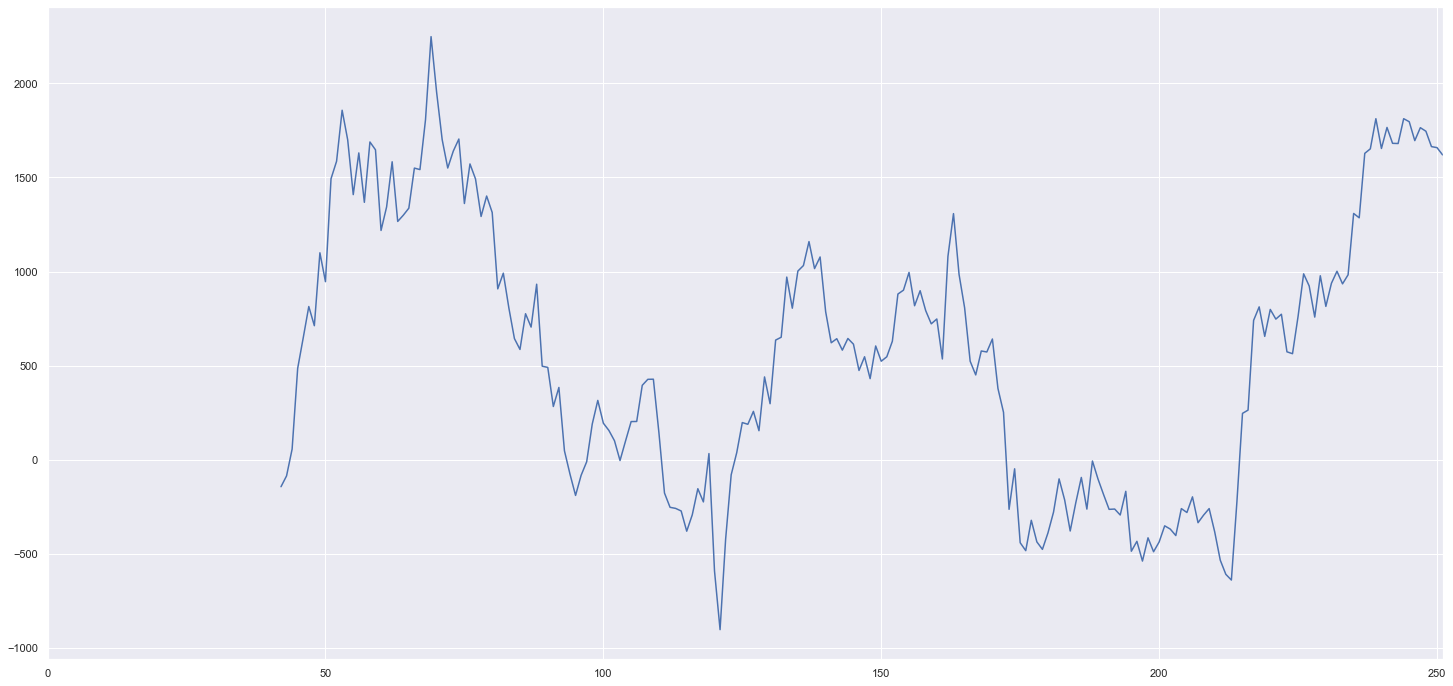

In [58]:
# Seasonality ( based on first difference ACF shows significance at 42 lag )
x = djia_df['Close'] - djia_df['Close'].shift( 42 )
x.plot()

In [59]:
# Seasonality ( based on first difference ACF shows significance at 42 lag )
x = djia_df['Close'] - djia_df['Close'].shift( 42 )
mod = sm.tsa.statespace.SARIMAX( djia_df['Close'], trend='n', order=(0,2,1), seasonal_order=(1, 1, 1, 42) )
sarimax = mod.fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Thu, 28 Nov 2019   AIC                           2741.141
Time:                                    05:59:29   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.163     -0.062      0.951     -32.679      30.679
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (Q):                       31.80   Jarque-Bera (JB):                21.28
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4.5. Forecast and Confidence Interval

Text(0, 0.5, 'Forecasted value')

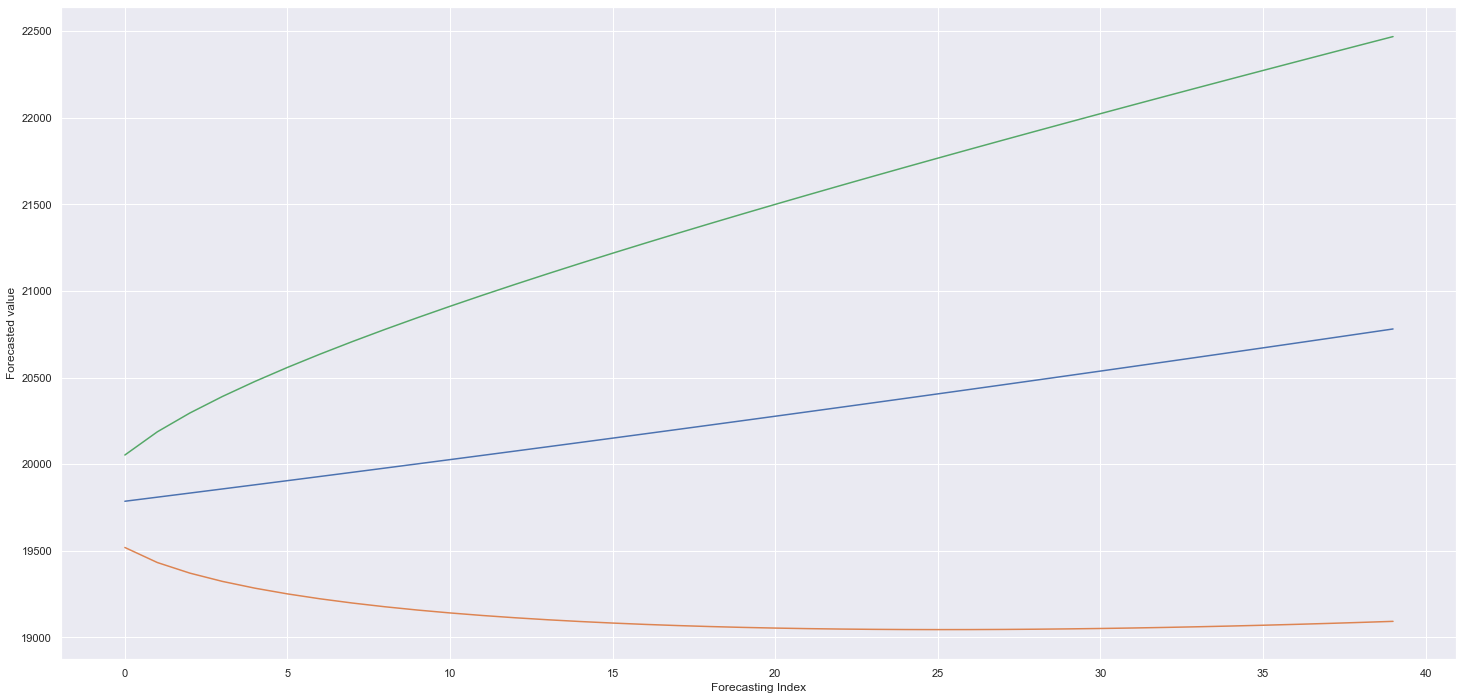

In [60]:
# Forecast and CI
f, err, ci = arima_obj_fit.forecast( 40 )
plt.plot( f )
plt.plot( ci )
plt.xlabel( 'Forecasting Index' )
plt.ylabel( 'Forecasted value' )

# CHAPTER 05 - Deep Learning for Time Series Forecasting
---

In [1]:
import os
import sys
import pandas as pd
import numpy  as np
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv( '../data/PRSA_data_2010.1.1-2014.12.31.csv' )

In [3]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply( lambda row: datetime.datetime( year=row['year'], month=row['month'], day=row['day'], hour=row['hour'] ), axis=1 )
df.sort_values( 'datetime', ascending=True, inplace=True )

Text(0.5, 1.0, 'Box plot of Air Pressure')

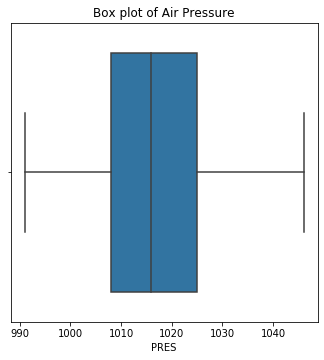

In [4]:
plt.figure( figsize=( 5.5, 5.5 ) )
g = sns.boxplot( df['PRES'] )
g.set_title( 'Box plot of Air Pressure')

/Users/meigarom/.pyenv/versions/3.8.0/envs/TimeSeriesAcademy/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Air Pressure readings in hPa')

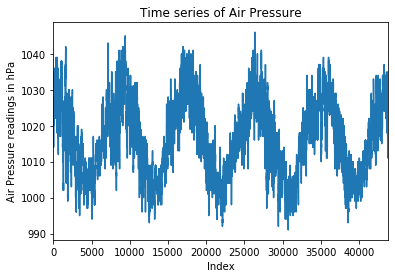

In [5]:
g = sns.tsplot( df['PRES'] )
g.set_title( 'Time series of Air Pressure' )
g.set_xlabel( 'Index' )
g.set_ylabel( 'Air Pressure readings in hPa' )

In [6]:
# Rescaling to [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range=(0, 1) )
df['scaled_PRES'] = scaler.fit_transform( np.array( df['PRES'] ).reshape( -1, 1 ) )

In [7]:
# Split training and test dataset
split_date = datetime.datetime( year=2014, month=1, day=1, hour=0 )
df_train = df.loc[df['datetime'] < split_date ]
df_val = df.loc[df['datetime'] >= split_date ]

print( 'Shape of train:', df_train.shape )
print( 'Shape of test:', df_val.shape )

Shape of train: (35064, 15)
Shape of test: (8760, 15)


/Users/meigarom/.pyenv/versions/3.8.0/envs/TimeSeriesAcademy/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Scaled Air Pressure readings')

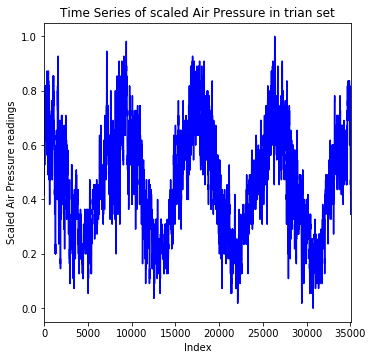

In [8]:
# Plot the training
plt.figure( figsize=( 5.5, 5.5 ) )
g = sns.tsplot( df_train['scaled_PRES'], color='b' )
g.set_title( 'Time Series of scaled Air Pressure in trian set' )
g.set_xlabel( 'Index' )
g.set_ylabel( 'Scaled Air Pressure readings' )

Text(0, 0.5, 'Scaled Air Pressure readings')

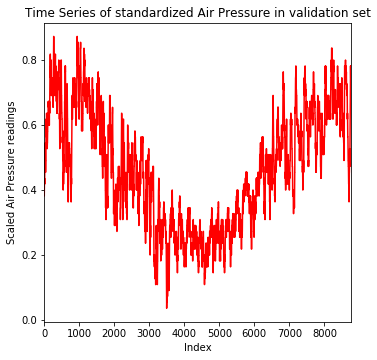

In [9]:
# Plot the validation
plt.figure( figsize=( 5.5, 5.5 ) )
g = sns.tsplot( df_val['scaled_PRES'], color='r' )
g.set_title( 'Time Series of standardized Air Pressure in validation set' )
g.set_xlabel( 'Index' )
g.set_ylabel( 'Scaled Air Pressure readings' )

In [23]:
def makeXy( ts, nb_timesteps ):
    """
    Input: 
        ts: original time series
        nb_timesteps: number of time steps in the regressors
    Output:
        X: 2-D array of regressors
        y: 1-D array of target
    """
    X = []
    y = []
    for i in range( nb_timesteps, ts.shape[0] ):
        X.append( list( ts.loc[i-nb_timesteps:i-1] ) )
        y.append( ts.iloc[i] )
    X, y = np.array( X ), np.array( y )
    
    return X, y 

In [24]:
X_train, y_train = makeXy( df_train['scaled_PRES'], 7 )
print( 'Shape of train arrays:', X_train.shape, y_train.shape )

X_val, y_val = makeXy( df_val['scaled_PRES'], 7 )
print( 'Shape of validation arrays:', X_val.shape, y_val.shape )

Shape of train arrays: (35057, 7) (35057,)
Shape of validation arrays: (8753, 0) (8753,)


In [29]:
from keras.layers     import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models     import Model, load_model
from keras.callbacks  import ModelCheckpoint

Using TensorFlow backend.


SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

In [ ]:
input_layer = Input( shape=(7,), dtype='float32' )

dense1 = Dense( 32, activation='linear' )( input_layer )
dense2 = Dense( 16, activation='linear' )( dense1 )
dense3 = Dense( 16, activation='linear' )( dense2 )

dropout_layer = Dropout( 0.2 )( dense 3 )

output_layer = Dense( 1, activation='linear' )( dropout_layer )

ts_model = Model( inputs=input_layer, outputs=output_layer )
ts_model.compile( loss='mean_squared_error', optimizer='adam' )
ts_model.summary()